# Classification of papers by their abstract
    Show if the paprer is about social media or not

## Header

First, we need to add certain libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Then, we need to read the csv file to add dataset to the project.

In [2]:
df = pd.read_csv("English_Dataset.csv", encoding='mbcs')
df['Relevant'] = df['Relevant'].fillna(0)       #replace NaN with 0
df['Relevant'] = df['Relevant'].astype(int)     #float to int
df.dropna(inplace=True)                         #drop any NaN value remained in dataset

We can see the datafram now.

In [3]:
print(df)

                                                   text  Relevant
0     Twitter's shares fell by more than 25pc in Oct...         1
1     A company with no revenues and barely any staf...         1
2     YouTube has been around forever, in digital te...         1
3     The New York offices of stockbrokers JP Morgan...         1
4     Facebook executives have been cautioning inves...         1
...                                                 ...       ...
2221  Many concepts have been proposed for meta lear...         0
2222  Many online communities present user-contribut...         0
2223  Logistic-normal topic models can effectively d...         0
2224  Principal geodesic analysis (PGA) is a general...         0
2225  We formulate the problem of optimizing the sam...         0

[2225 rows x 2 columns]


Getting numpy array of the databasefor furthue usage.

In [4]:
data_x = df['text'].to_numpy()
data_y = df['Relevant'].to_numpy()

## Preprocessing

Almost every Natural Language Processing (NLP) task requires text to be preprocessed before training a model. Learning models cannot use raw text directly, so it is up to us to clean the text and extraxt features to train our model. 
<br> Processing contains different levels. In this project we use these levels:
<br> 1. Lowercase
<br> 2. Removing Punctuation
<br> 3. Stopword Filtering
<br> 4. Word Tokenization
<br> 5. Word to Vector
<br> 6. Train Test Split

### Lowercase

After that, the first step is to lowercase all the strings so it would be easier to understand the similarities.

In [5]:
data_x = np.array([data_x[i].lower() for i in range(data_x.shape[0])])

### Removing Punctuation

Now that all the data are lowercased we need to remove punctuation.First we add the library needed.

In [6]:
import string

These marks do not contain any useful informaition so we can delete them without causing any trouble.
<br>To remove punctuation, we save only the characters that are not punctuation

In [7]:
print('Punctuations that are needed to be removed are:', string.punctuation)   #To show the punctuation marks to see what we need to remove
data_x = np.array(["".join([char for char in data_x[i] if char not in string.punctuation]) for i in range(data_x.shape[0])])
data_x.shape

Punctuations that are needed to be removed are: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


(2225,)

### Stopword Filtering

Stopwords are those words in every language that are commonly used and dose not possess any important informaition about the content of the text. To see these words and try to get them out of our data base we need to add the relevant library

In [8]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords

All the stopwords that will be deleted by this library are:

In [9]:
print(gensim.parsing.preprocessing.STOPWORDS)

frozenset({'say', 'nobody', 'wherever', 'get', 'fill', 'mostly', 'thereupon', 'whereby', 'it', 'etc', 'amongst', 'seems', 'hereupon', 'all', 'on', 'due', 'becomes', 'does', 'mine', 'even', 'others', 'for', 'afterwards', 'thus', 'ie', 'ten', 'onto', 'made', 'off', 'each', 'though', 'whom', 'about', 'anything', 'that', 'name', 'whereafter', 'other', 'to', 'yet', 'forty', 'should', 'become', 'will', 'seemed', 'seem', 'just', 'where', 'ourselves', 'be', 'are', 'six', 'over', 'without', 'behind', 'itself', 'take', 'side', 'meanwhile', 'these', 'together', 'yours', 'sincere', 'top', 'how', 'full', 'within', 'twenty', 'can', 'less', 'eleven', 'five', 'have', 'mill', 'them', 'first', 'something', 'third', 'anyway', 'me', 'my', 'who', 'moreover', 'always', 'more', 'else', 'during', 'when', 'a', 'seeming', 'per', 'wherein', 'than', 'whether', 'herein', 'they', 'around', 'bottom', 'bill', 'thru', 'very', 'another', 'been', 'beforehand', 'same', 'your', 'really', 'became', 'doesn', 'whereupon', 'o

In [10]:
data_x = np.array([remove_stopwords(data_x[i]) for i in range(data_x.shape[0])])

### Word Tokenization

Word tokenization is the process of splitting a large sample of text into words.
<br>Next we need to tokenize our data for further use.

In [11]:
from nltk import word_tokenize

Strings can be tokenized into tokens via nltk.word_tokenize.

In [12]:
data_x = (([word_tokenize(data_x[i], language='english', preserve_line= True) for i in range(data_x.shape[0])]))

### Word to Vector

The last part of the preprocessing is to get trsnsform our tokenized data to a vector so it can be used to train our model.

In [13]:
from gensim.models import Word2Vec

Now we need to see most commonly used words in all the database and count each one in one line to get the features
<br> We try to get the words that are repeated at least 10 times in our databese

In [14]:
word2vec = Word2Vec(data_x, min_count=10)
vocabulary = word2vec.wv.index_to_key
print(f'Count of the words who are used at least 10 times = {len(vocabulary)}')

Count of the words who are used at least 10 times = 8296


Now we put all features extracted into an array so we have the pure features of the dataset to train our model

In [15]:
data = np.array([np.array([list.count(j, i) for i in vocabulary]) for j in data_x])
data.shape

(2225, 8296)

### Train Test Split

Last step of the preprocessing is to split our dataset into 2 parts of train and test data.
<br>We add the library needed

In [16]:
from sklearn.model_selection import train_test_split

Then we split our data into 2 parts. 70% of the data as our training set and the rest as the test set

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, data_y, train_size=.7)

In [18]:
print(x_train)
print(x_train.shape)
print('\n')
print(y_train)
print(y_train.shape)

[[ 2  0  0 ...  0  0  0]
 [ 0  2  5 ...  0  0  0]
 [11  0  0 ...  0  0  0]
 ...
 [ 0  6  4 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  9  1 ...  0  0  0]]
(1557, 8296)


[0 1 1 ... 0 1 1]
(1557,)


## Classification

Now that we got feature matrix from the raw database, we can start training our models. First we import needed models and functions from the sklearn library

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

First model we try to train is SVM model. We try kernel='rbf', decision_function_shape='ovo' and try Soft SVM with coefficient C from 0.1 to 10 by 20 log points.

In [20]:
parameters = {'C':np.logspace(start=-1, stop=1, num=20)}
grid = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovo', gamma='scale'), param_grid=parameters, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

Now we need to see how our model respond and get the accuracy score of our model.

In [21]:
y_predicted = grid.predict(x_test)
accuracy_score(y_test, y_predicted)

0.8368263473053892

And also we can see which coefficient C is the best.


In [22]:
grid.best_estimator_

SVC(C=4.832930238571752, decision_function_shape='ovo')

And the last step is to look at the confusion matrix and see how our model respond to the test data.
<br>In this confusion matrix ,i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

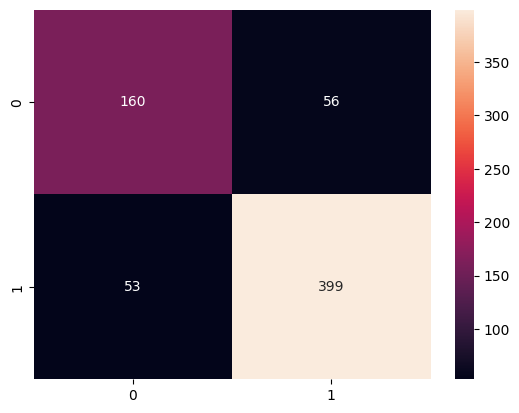

In [23]:
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='d');

Now we try again with KNN model. KNN is really fast to trian but the accuracy score is lower.

In [24]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors':[i+1 for i in range(30)]})
knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [25]:
y_predicted_knn = knn.predict(x_test)
accuracy_score(y_test,y_predicted_knn)

0.7410179640718563

In [26]:
knn.best_estimator_

KNeighborsClassifier()

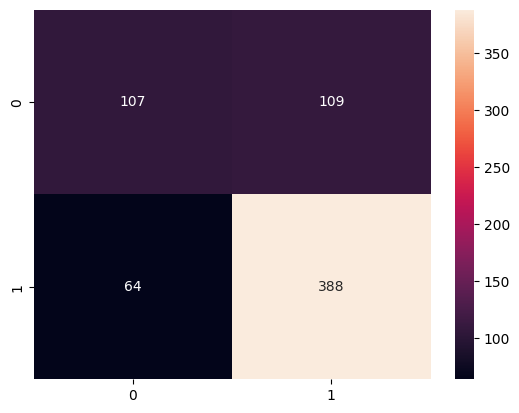

In [27]:
sns.heatmap(confusion_matrix(y_test, y_predicted_knn), annot=True, fmt='d');